# Time Series Analysis of Spanish Wine Production 

**Arthur Trim, Kane Smith, Jordan Keelan, Rodrigo Rosales Alvarez, Scott Bennett**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
import math
import warnings

from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.optimizers import Adagrad
from keras.layers import Dense, LSTM
from keras.wrappers.scikit_learn import KerasRegressor
from keras.losses import huber_loss

# Set seaborn theme for plots
sns.set_theme(style="darkgrid")

# Ignore warnings
warnings.filterwarnings("ignore")

## 1: Introduction 

### 1.1: Background and Context  

Agricultural production is the foundation of the global economy. Globally it provides jobs to over 1 billion people (Map of the month 2020) and provides food security to billions. Without agriculture, there would be no way to support our current population numbers and density. Without affordable and efficient access to food, economies world collapse. The importance of agricultural production cannot be overstated. For this project we are focused on Spanish production.  

Wine has always been an important beverage in society, not only for its taste and flavor; economically, wine production is a significant industry that generates billions of dollars in revenue each year. Moreover, wine is highly related with tourism, as people will travel to wineries to experience the production process and taste different varieties of wine, this has a huge positive impact on local economies, as tourism can create jobs and generate revenue for local businesses. 

Socially, wine plays an important role as it often accompanies celebrations and special occasions. Wine brings people together, creating and strengthening relationships.  

Spain is one of the most important wine-producing countries in the world and according to the International Organization of Vine and Wine (OIV), is among the top three wine-producing countries along with Italy and France. In 2020, Spain produced 1,310,174 tons of wine, accounting for 16% of the world's total wine production. 

As population continues to grow, so must food production. As we enter an era of increased variance in global temperatures, weather patterns, and natural disasters understanding the nature of food production trends will be necessary in assessing the health of our agricultural industries. Forecasting can help to inform law/policy makers, it can help to optimize resource allocation, and inform supply chains. 

Time series analysis is a statistical and machine learning technique used to model trends and forecast future values of temporal data. This type of analysis will be effective in understanding, describing, and predicting trends in agricultural data production. Time series analysis techniques such as Autoregressive Integrated Moving Average (ARIMA), Seasonal ARIMA (SARIMA), Long Short-Term Memory (LSTM) networks, and Facebook Prophet, can be employed to model and predict crop production trends. Each of these methods offers unique advantages and limitations, depending on the underlying data structure, model complexity, and forecasting requirements. 

<br>

### 1.2: Objectives of the Study  

This study aims to apply different time series analysis techniques to the FAOSTAT production indices dataset, obtained from the Food and Agriculture Organization of the United Nations (FAO), to forecast crop production trends. The results will provide insights into the most appropriate time series forecasting method for predicting crop production trends and offer valuable input for decision-making in agricultural planning and management. 

<br>

## 2: Project Dataset 

### 2.1 FAOSTAT Crops and Livestock Products Dataset 

The Food and Agriculture Organization (FAO) is a United Nations agency dedicated to leading international efforts to combat hunger. FAO's mission is to ensure food security for all, enabling individuals to have consistent access to sufficient, high-quality food to maintain active and healthy lives. 

The FAOSTAT data portal offers a diverse range of data on subjects such as food production, food security, trade, climate change, and other relevant indicators. In this study, we will concentrate on the "Crops and Livestock Products" dataset, which encompasses variables like country, year, and specific crop production data.  

<br>

### 2.2 Data Collection Process 

The FAOSTAT portal provides a user-friendly interface for data extraction, allowing both bulk data downloads and pre-filtered selections based on specific parameters. For this study, we will utilize the pre-filtering option to obtain data specific to our target crop, location, and time series for modeling purposes. The extracted data will be saved in CSV format, facilitating further manipulation and modeling using Python3. 

In [31]:
# parent directory
parent = os.path.dirname(os.getcwd())

# load main csv
wine_url = "https://raw.githubusercontent.com/JordanKeelan/data607_finalProject/main/faostat_wine.csv"
wine = pd.read_csv(wine_url)

### 2.3: Data Pre-processing 

Before starting our analysis, we cleaned up the CSV data from the FAOSTAT portal with the following steps: 
- Reviewed the columns in the data table to check for irrelevant columns. 
- Used python to check for the unique values for units in the dataset and confirmed that the wine production data is all reported in tons, with no other units appearing. 
- Converted the ‘Year’ text values into Datetime format. 
- Removed any extraneous records from the table by discarding any rows with null data in the ‘Value’ column. 
- Dropped unnecessary columns so only the Area, Year, and Value columns remain. 
- Indexed the Year column in the data tables. 

With these steps complete, we obtain cleaned data tables with annual wine production and temperature variation for our selected countries (Italy, France, Spain, and the USA).

In [32]:
# Confirm only one unit in dataset
set(wine["Unit"].unique())

{'tonnes'}

In [33]:
# Set datatype of Year column to datetime
wine["Year"] = pd.to_datetime(wine["Year Code"],format="%Y")

# Remove rows with null values in "value" column
wine = wine[wine["Value"].notna()]

# Isolate Spain
wine = wine[wine['Area'] == 'Spain']

# Remove unnecessary columns
wine = wine[["Year","Value"]]\

# Datetime index dataframes
wine = wine.set_index("Year")

## 3: Exploratory Data Analysis (EDA)  

### 3.1: Visualizations and Trends Analysis  


<br>

In [ ]:
wine

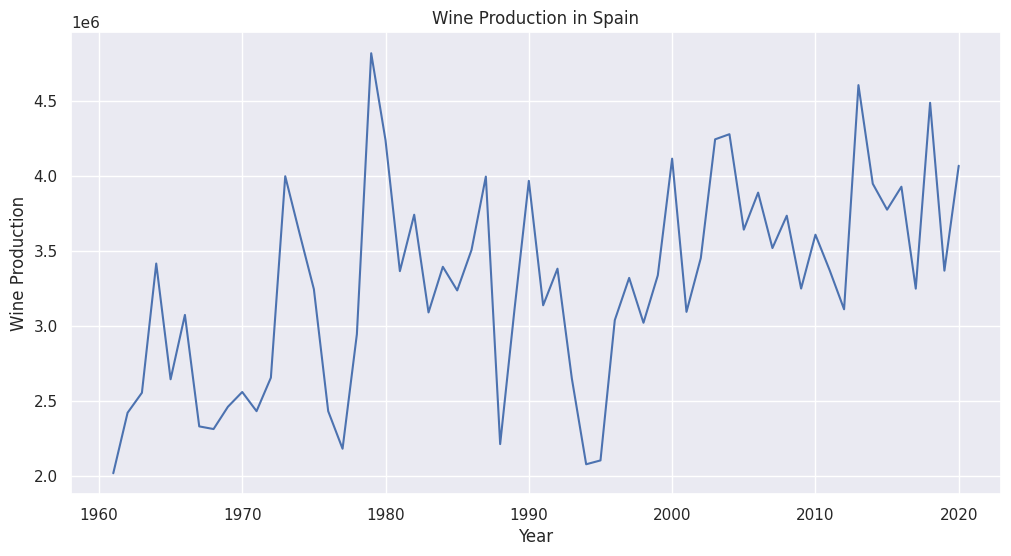

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(wine)
plt.xlabel('Year')
plt.ylabel('Wine Production')
plt.title('Wine Production in Spain')
plt.show()

### 3.2: Seasonality and Patterns  

<br>



### 3.3: Unusual Observations and Data Issues 

<br>

## 4: Time Series Decomposition  

### 4.1 Trend Component  

<br>

### 4.2: Seasonal Component  

<br>

### 4.3: Residual Component 

<br>

## 6: Model Development


### 6.1: ARIMA Model  

Autoregressive Integrated Moving Average is a type of time series model used to analyze and forecast future values of a time series based on its past behavior, or lagged values. It is important to stablish that this model does not consider seasonality of the data.  

The ARIMA model is composed of three components:  
- Autoregressive Component: represents the correlation between the current value of the time series and its past values. 
- Integrated Component: represents the differencing of the time series to make it stationary. 
- Moving Average Component: represents the correlation between the current value and the errors of past predictions. 

ARIMA models are widely used in different industries like finance, economics, and other fields where forecasting is important; also, is widely used for outlier detection.  

The most important assumption of the ARIMA model is that the data is stationary, in other words that the mean and variance of the data remains constant over time. To prove it, we used the Augmented Dickey-Fuller test, this test has a Null Hypothesis that the data is non-stationary. We obtained a p_value of 0.00007, meaning that we can reject the Null, and state that our data presents stationarity.  

To implement the ARIMA model in python we used the *ARIMA* class present in the *statsmodels.tsa.arima.model* module as it provides a convenient way to fit an ARIMA model into a time series analysis and offers the possibility to forecast and evaluate the model.  

**6.1.2: Parameter Selection**

Three parameters that are important to build an ARIMA model are: 
- P: represents the number of lagged values of the time series that are included in the model. 
- Q: represents the number of lagged errors of the time series that are included in the model. 
- D: represents the number of times that the time series is differenced to achieve stationarity. 

Grid Search is a technique used for hyperparameter tuning in machine learning models, in other words is a method for systematically testing different combinations of hyperparameters to identify the best set of parameters for a given model. We found that the best parameters for our model are p=4, q=3, d=2. 

**6.1.2: Model Fitting**  

To train our model, we used annually wine production in Spain from 1961 to 2010 and used data from 2011 to 2020 to test our model. Please check the Appendix A, section ARIMA to review the code we implemented.  

Here below, we can observe the real production of wine in Spain in pink and the predicted value from our ARIMA model in blue. As we can see, our prediction follows the general trend of the data. 

In [ ]:
# Grid Search ARIMA
country = 'Spain'
value = 'Value'

# Prepare the training and testing data
train = wine[(wine['Area'] == country)].iloc[0:50]
test = wine[(wine['Area'] == country)].iloc[50:]

# Define the range of p, d, q, P, D, and Q values
p = range(0, 6)
d = range(0, 3)
q = range(0, 6)

# Generate all possible combinations of p, d, q
parameter_combinations = list(itertools.product(p, d, q))

# Initialize the best model parameters and the lowest MAE
best_parameters = None
lowest_mae = float("inf")

# Train and evaluate models for each combination
for parameters in parameter_combinations:
    p, d, q = parameters
    try:
        # Fit the SARIMAX model
        model = ARIMA(train[value], order=(p, d, q))
        model_fit = model.fit()

        # Make predictions
        predictions = model_fit.predict(start=test[value].index[0], end=test[value].index[-1], typ='levels')

        # Calculate the Mean Absolute Error
        mae = mean_absolute_error(test[value], predictions)

        # Update the best parameters if the current MAE is lower than the previous lowest MAE
        if mae < lowest_mae:
            lowest_mae = mae
            best_parameters = parameters
    except:
        continue

# Print the best parameters and the lowest MAE
print(f"Best parameters: {best_parameters}")
print(f"Lowest MAE: {lowest_mae:.2f}")

# Plot best parameters
arima_model = ARIMA(train[value], order = best_parameters) 
arima_model_fit = arima_model.fit()
predicted_values = arima_model_fit.predict(start=test[value].index[0], end=test[value].index[-1], typ='levels')
output = pd.concat([predicted_values, test[value]], axis=1, join="inner")

plt.figure(figsize=(10,5))
real = plt.plot(wine[(wine['Area'] == country)][value], color='pink',label='Real')
predicted = plt.plot(output.iloc[:,0], color='b', label='Predicted', linestyle='--')
plt.title('Real vs Predicted')
plt.legend(loc='best')
plt.show()

**6.1.3: Performance Evaluation**

Mean Absolute Error (MAE) is used to measure the accuracy of time series forecasting models. It measures the average absolute difference between the predicted and actual values over a given period; a lower value of MAE is desired, which would mean that the model has better accuracy for time series forecasting. For our ARIMA model we got a MAE of 362,190.09 tones of wine.  

<br>

### 6.2: SARIMA Model  

**6.2.1: Seasonal Decomposition**

**6.2.2: Parameter Selection**  

**6.2.3: Model Fitting**  

**6.2.4: Performance Evaluation**  

<br>

### 6.3: LSTM Networks  

We wanted to create a proof-of-concept neural network for our time series analysis to show ourselves how it would be implemented. Due to the simplicity of it's structure, we did not expect it to outperform some of our other models.

LSTM stands for Long Short-Term Memory and is a type of recurent neural network that can be used for time series analysis. The LSTM can take a sequence of previous observations and then predict the next value of the sequence. One of the benefits of using a neural network for time series analysis is it can learn compelx patterns in the data if you have enough data and you tune it correctly; the downside is that it can computationally expensive. Because of this, we we only made a simple LSTM and only searched a small hyperparameter space for tuning the model.

**6.3.1: Hyperparameter Selection**

In TensorFlow's implementation of LSTM, there are many parameters we can tune to try to improve the model. 

- Epochs: The number of times the dataset is presented to the model during training. The more epochs, the more computation it will take to train.
- Batch size: The number of training examples used in one iteration of the training process.
- Neurons: The number of neurons in a layer of the LSTM.
- Dropout rate: A regularization technique that randomly drops out some neurons from the model to avoid overfitting.
- Learning rate: The magnitude of updates made to model in resonse to the loss function output.
- Optimizer: The optimization algorithm used to minimize the loss function.

To keep things simple since we did not have a lot of time to run our model, we set epochs to 100, batch size to 1, dropout rate to, neurons to 300 and the optimization algorithm to 'adagrad'. We then used GridSearch to find the best combination in the paramter space of learning_rate = [0.001, 0.01, 0.1].

<br>

**6.3.2: Data Pre-processing** 

In [ ]:
spain_df = wine[wine["Area"] == "Spain"]
df = spain_df.drop(["Unnamed: 0", "Value_log", "Value Transform", "Area"], axis = 1).reset_index(drop=False)
data = df[['Value']].values

# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# split data into train and test sets
train_size = len(data) - 14
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

# create function to convert data into time series dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# convert data into time series dataset
look_back = 3
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

**6.3.2: Model Training**  

In [ ]:
# create LSTM model
def create_model(lr=0.001):
    model = Sequential()
    model.add(LSTM(300, dropout=0.1, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adagrad')
    return model

# create KerasRegressor
model = KerasRegressor(build_fn=create_model)

# define hyperparameters to search over
params = {'lr': [0.001, 0.01, 0.1]}


grid = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# fit the grid search
grid_result = grid.fit(X_train, Y_train, batch_size=1, verbose=0)

# print the best results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# retrain the model on the best hyperparameters
best_lr = grid_result.best_params_['lr']

model = create_model(lr=best_lr)
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# invert predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

**6.3.3: Performance Evaluation** 

In [ ]:
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_score =mean_squared_error(Y_test[0], test_predict[:,0])
print("Test MAE: ", test_score)


dates = ["2011-01-01", "2012-01-01", "2013-01-01","2014-01-01","2015-01-01","2016-01-01","2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01"]
pred_df = pd.DataFrame(data=test_predict, index = dates, columns=["y_pred"])

plt.figure(figsize=(10,5))
real = plt.plot(spain_df["Value"], color="pink", label="real")
predicted = plt.plot(pred_df["y_pred"], color = "b", linestyle='--', label="predicted")
plt.legend(loc="best")
plt.show()

Our model gives us a MAE of 467,686.06 tonnes, which as we expected is worse compared to our ARIMA and SARIMA models. If we had more time to tune our model structure and hyperparameters, we would expect the LSTM to perform much better.

### 6.4: Facebook Prophet  

**6.4.1: Data Preparation**  

**6.4.2: Model Fitting**  

**6.4.3: Performance Evaluation** 

<br>

## 7: Model Comparison and Selection  

### 7.1: Model Performance Metrics Comparison  

<br>

### 7.2: Best Model Selection

<br>

## 8: Forecasting and Visualization  

### 8.1: Future Crop Production Forecast  

<br>

### 8.2: Visualization of Forecasted Values and Confidence Intervals 

<br>

## 9: Conclusion and Future Work  

### 9.1: Summary of Findings  

<br>

### 9.2: Recommendations  

<br>

### 9.3: Future Research Directions 

In the future we would like to explore the important wine productors in the world like Italy, France and the United States to see if they behave similarly and if models created for those countries perform better than the one, we created for Spain.  

We would like to include exogenous variables in the analysis as they provide additional information that can help improve the accuracy and predictive power of a model. Additionally, they can help you to identify causal relationships between variables. 

Lastly, we would like to investigate further the topic to understand the reasoning behind some trends we observed in the data.  

<br>

## 10: References 
- Bajaj, A. (2023, January 26). Arima & Sarima: Real-world time series forecasting. neptune.ai. Retrieved March 22, 2023, from https://neptune.ai/blog/arima-sarima-real-world-time-series-forecasting-guide  
- Bonaros, B. (2022, July 4). Time series decomposition in Python. Medium. Retrieved March 22, 2023, from https://towardsdatascience.com/time-series-decomposition-in-python-8acac385a5b2  
- FOASTAT Crops and livestock products. Faostat. (n.d.). Retrieved March 22, 2023, from https://www.fao.org/faostat/en/#data/QCL 
- Hayes, A. (2023, January 5). Autoregressive integrated moving average (ARIMA) prediction model. Investopedia. Retrieved March 22, 2023, from https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp  
- Kalita, D. (2022, March 24). An overview on Long short term memory (lstm). Analytics Vidhya. Retrieved March 22, 2023, from https://www.analyticsvidhya.com/blog/2022/03/an-overview-on-long-short-term-memory-lstm/  
- Map of the month: How many people work in agriculture? Resource Watch Blog. (2020, May 4). Retrieved March 22, 2023, from https://blog.resourcewatch.org/2019/05/30/map-of-the-month-how-many-people-work-in-agriculture/#:~:text=The%20chart%20below%20shows%20data,down%20from%2044%25%20in%201991.  
- Quick start. Prophet. (2023, February 28). Retrieved March 22, 2023, from https://facebook.github.io/prophet/docs/quick_start.html 
- El Niño Southern Oscillation (ENSO) region sea surface temperature forecasts. https://www.metoffice.gov.uk/research/climate/seasonal-to-decadal/gpc-outlooks/el-nino-la-nina#:~:text=Some%20regions%20have%20impacts%20that,the%20text%20on%20the%20map. 